In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [36]:
#Lire l'image du singe et l'afficher
fichier = "Singe.jpg"
img = cv2.imread(fichier, cv2.IMREAD_COLOR)
cv2.imshow("Image originale", img)
cv2.waitKey(0)

-1

In [61]:
#Création d'une fonction pour redimensionner une image
def resize(img, largeur, hauteur):
    return cv2.resize(img,(largeur,hauteur),interpolation=cv2.INTER_AREA)

resized_image = resize(img, 100, 200)
cv2.imshow("Image redimensionnée", resized_image)
cv2.waitKey(0)

-1

In [40]:
#Création d'une fonction pour retourner une image
def rotate(img, sens):
    return cv2.flip(img, sens)

rotated_image = rotate(img, 0)
cv2.imshow("Image retournée", rotated_image)
cv2.waitKey(0)

-1

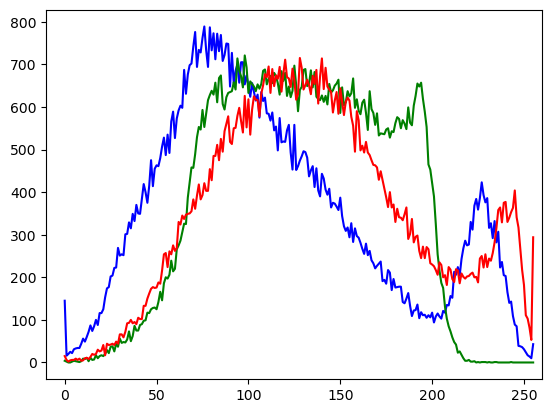

In [16]:
#Création d'un histogramme pour afficher les différents canaux
#Histogramme par une boucle
colors = ('b','g','r') 
for i, col in enumerate(colors):
    histogramme = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histogramme, color=col)
    plt.xlim([-10,260])
plt.show()

In [68]:
#Convertir l'image en niveau de gris
def convertGrayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = convertGrayscale(img)
cv2.imshow("Image en niveau de gris", img_gray)
cv2.waitKey(0)

-1

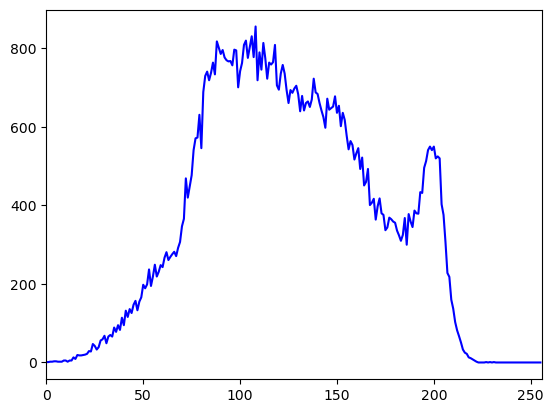

In [11]:
#Générer l'histogramme relatif à l'image en niveau de gris
histogramme2 = cv2.calcHist([imgNG],[0],None,[256],[0,256])
plt.plot(histogramme2, color='b')
plt.xlim([0,256])
plt.show()

In [71]:
#Affichage de tous les résultats sur une seule image

#Création de la fenêtre en noire
imgRes = np.zeros([3*img.shape[0], 3*img.shape[1], 3], np.uint8)
cv2.imshow("Traitement d images", imgRes)
cv2.waitKey(0)

-1

In [72]:
def copyToImage(imgA, imgB, offsetX, offsetY):
    for i in range (imgA.shape[0]):
        for j in range (imgA.shape[1]):
            imgB[i+offsetX, j+offsetY, 0] = imgA[i,j,0]
            imgB[i+offsetX, j+offsetY, 1] = imgA[i,j,1]
            imgB[i+offsetX, j+offsetY, 2] = imgA[i,j,2]

def imageTo3ChannelImage(img):
    imgRes = np.zeros([img.shape[0], img.shape[1], 3], np.uint8)
    for i in range (img.shape[0]):
        for j in range (img.shape[1]):
            imgRes[i, j, 0] = img[i,j]
            imgRes[i, j, 1] = img[i,j]
            imgRes[i, j, 2] = img[i,j]
    return imgRes

img3channel = imageTo3ChannelImage(img_gray)

copyToImage(img, imgRes, 0, 0)
copyToImage(rotated_image, imgRes, 0, img.shape[1])
copyToImage(resized_image, imgRes, img.shape[0], 0)
copyToImage(img3channel, imgRes, 0, img.shape[0]*2)
cv2.imshow("Resultat", imgRes)
cv2.waitKey(0)

-1